In [1]:
import matplotlib.pyplot as plt

import pickle
from flipper import flipperDict
from flipper import mtm
from flipper import prewhitener
import scipy
import time
import sys

import pylab
import numpy
import os

from flipper import liteMap
from flipper import fftTools

from matplotlib import rc
from multiprocessing import Pool
rc('text',usetex=True)
import numpy as np

from cactusLib import cactusBeams

/home/cvargas/.local/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
pfile = "/home/cvargas/sim_analysis/param_spectrum_148_s2.txt"

In [3]:
params = flipperDict.flipperDict()
params.read_from_file(pfile)

dataPath = "%s/%s"%(params['dataPath'], params['mapTag'])
outPath = "/home/cvargas/sim_analysis/spectrum/%s"%params['mapTag']
previous = "%s/%s"%("/home/cvargas/sim_analysis/spectrum", params['path2load'])

In [4]:
# s4 Maps

In [5]:
#mask = "/home/cvargas/sim_analysis/South_mask_148277s4LR.fits"

#mask = "/home/cvargas/sim_analysis/South_mask_15mJy.fits"

mask = "/home/cvargas/sim_analysis/South_mask_148218277s4LR.fits"

In [6]:
#148s2

#map1_148 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split0_v3_summed.fits"
#weight1_148 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split0_hits_v3.fits"

#map2_148 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split1_v3_summed.fits"
#weight2_148 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split1_hits_v3.fits"

#map3_148 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split2_v3_summed.fits"
#weight3_148 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split2_hits_v3.fits"

#map4_148  = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split3_v3_summed.fits"
#weight4_148 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split3_hits_v3.fits"


#148s4

#map1_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_4_4way_split0_v3_summed.fits"
#weight1_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_4_4way_split0_hits_v3.fits"

#map2_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_4_4way_split1_v3_summed.fits"
#weight2_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_4_4way_split1_hits_v3.fits"

#map3_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_4_4way_split2_v3_summed.fits"
#weight3_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_4_4way_split2_hits_v3.fits"

#map4_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_4_4way_split3_v3_summed.fits"
#weight4_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_4_4way_split3_hits_v3.fits"


In [7]:
#148s2

map1_148 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split0_v3_src_free.fits"
weight1_148 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split0_hits_v3.fits"

map2_148 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split1_v3_src_free.fits"
weight2_148 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split1_hits_v3.fits"

map3_148 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split2_v3_src_free.fits"
weight3_148 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split2_hits_v3.fits"

map4_148  = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split3_v3_src_free.fits"
weight4_148 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_148_south_season_2/ACT_148_south_season_2_4way_split3_hits_v3.fits"


#148s4

map1_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_270_south_season_4_4way_set_0_calgc_nodown_actpix_planet_atm_nosrc_900.fits"
weight1_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_270_south_season_4_4way_set_0_calgc_nodown_actpix_planet_atm_weights.fits"

map2_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_270_south_season_4_4way_set_1_calgc_nodown_actpix_planet_atm_nosrc_900.fits"
weight2_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_270_south_season_4_4way_set_1_calgc_nodown_actpix_planet_atm_weights.fits"

map3_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_270_south_season_4_4way_set_2_calgc_nodown_actpix_planet_atm_nosrc_900.fits"
weight3_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_270_south_season_4_4way_set_2_calgc_nodown_actpix_planet_atm_weights.fits"

map4_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_270_south_season_4_4way_set_3_calgc_nodown_actpix_planet_atm_nosrc_900.fits"
weight4_218 = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_270_south_season_4_4way_set_3_calgc_nodown_actpix_planet_atm_weights.fits"


In [8]:
RA0 = 63.
RA1 = 108.
DEC0 = -55.5
DEC1 = -50.5

ltmask = liteMap.liteMapFromFits(mask)

#split1

ltmap1_148 = liteMap.liteMapFromFits(map1_148)
ltweight1_148  = liteMap.liteMapFromFits(weight1_148)

ltmap1_148 = ltmap1_148.selectSubMap(RA0,RA1,DEC0,DEC1)
ltweight1_148 = ltweight1_148.selectSubMap(RA0,RA1,DEC0,DEC1)


ltmap1_218 = liteMap.liteMapFromFits(map1_218)
ltweight1_218  = liteMap.liteMapFromFits(weight1_218)

ltmap1_218 = ltmap1_218.selectSubMap(RA0,RA1,DEC0,DEC1)
ltweight1_218 = ltweight1_218.selectSubMap(RA0,RA1,DEC0,DEC1)


#split2

ltmap2_148 = liteMap.liteMapFromFits(map2_148)
ltweight2_148  = liteMap.liteMapFromFits(weight2_148)

ltmap2_148 = ltmap2_148.selectSubMap(RA0,RA1,DEC0,DEC1)
ltweight2_148 = ltweight2_148.selectSubMap(RA0,RA1,DEC0,DEC1)

ltmap2_218 = liteMap.liteMapFromFits(map2_218)
ltweight2_218  = liteMap.liteMapFromFits(weight2_218)

ltmap2_218 = ltmap2_218.selectSubMap(RA0,RA1,DEC0,DEC1)
ltweight2_218 = ltweight2_218.selectSubMap(RA0,RA1,DEC0,DEC1)

#split3

ltmap3_148 = liteMap.liteMapFromFits(map3_148)
ltweight3_148  = liteMap.liteMapFromFits(weight3_148)

ltmap3_148 = ltmap3_148.selectSubMap(RA0,RA1,DEC0,DEC1)
ltweight3_148 = ltweight3_148.selectSubMap(RA0,RA1,DEC0,DEC1)

ltmap3_218 = liteMap.liteMapFromFits(map3_218)
ltweight3_218  = liteMap.liteMapFromFits(weight3_218)

ltmap3_218 = ltmap3_218.selectSubMap(RA0,RA1,DEC0,DEC1)
ltweight3_218 = ltweight3_218.selectSubMap(RA0,RA1,DEC0,DEC1)

#split4

ltmap4_148 = liteMap.liteMapFromFits(map4_148)
ltweight4_148  = liteMap.liteMapFromFits(weight4_148)

ltmap4_148 = ltmap4_148.selectSubMap(RA0,RA1,DEC0,DEC1)
ltweight4_148 = ltweight4_148.selectSubMap(RA0,RA1,DEC0,DEC1)

ltmap4_218 = liteMap.liteMapFromFits(map4_218)
ltweight4_218  = liteMap.liteMapFromFits(weight4_218)

ltmap4_218 = ltmap4_218.selectSubMap(RA0,RA1,DEC0,DEC1)
ltweight4_218 = ltweight4_218.selectSubMap(RA0,RA1,DEC0,DEC1)

In [9]:
ltmask.data = ltmask.data*0.+1.

In [10]:
ltmap1_148.data.shape

(613, 3245)

In [11]:
ltweight1_148.data.shape

(613, 3245)

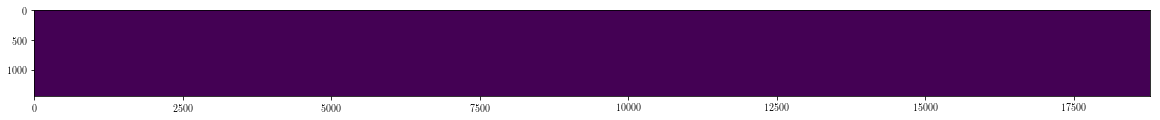

In [12]:
plt.figure(figsize = (20,10))
plt.imshow(ltmask.data)

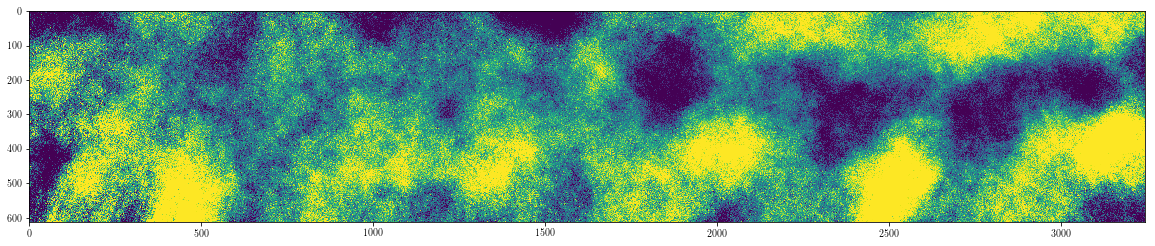

In [13]:
plt.figure(figsize = (20,10))
plt.imshow(ltmap1_148.data,vmin=-500.,vmax=500.)

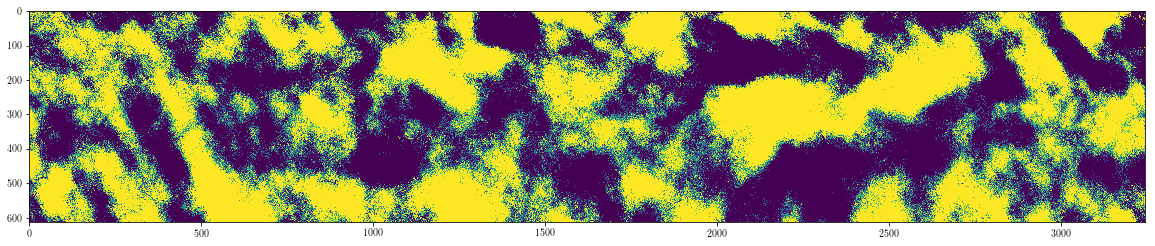

In [14]:
plt.figure(figsize = (20,10))
plt.imshow(ltmap1_218.data,vmin=-500.,vmax=500.)

In [15]:
#Low ell filter

Ny,Nx = ltmap1_148.data.shape
#taper
pad = 10
extraYPad = 0
apodNy,apodNx = ltmap1_148.data.shape
apod = np.zeros((apodNy,apodNx))
apod[pad+extraYPad:apodNy-pad-extraYPad,pad:apodNx-pad] = 1.0
N_apod = scipy.ndimage.gaussian_filter(apod,10,mode="constant")

CMB1_148 = ltmap1_148.data
CMB_apod1_148 = CMB1_148*N_apod

CMB2_148 = ltmap2_148.data
CMB_apod2_148 = CMB2_148*N_apod

CMB3_148 = ltmap3_148.data
CMB_apod3_148 = CMB3_148*N_apod

CMB4_148 = ltmap4_148.data
CMB_apod4_148 = CMB4_148*N_apod


CMB1_218 = ltmap1_218.data
CMB_apod1_218 = CMB1_218*N_apod

CMB2_218 = ltmap2_218.data
CMB_apod2_218 = CMB2_218*N_apod

CMB3_218 = ltmap3_218.data
CMB_apod3_218 = CMB3_218*N_apod

CMB4_218 = ltmap4_218.data
CMB_apod4_218 = CMB4_218*N_apod


ltmap1_148.data = CMB_apod1_148
ltmap2_148.data = CMB_apod2_148
ltmap3_148.data = CMB_apod3_148
ltmap4_148.data = CMB_apod4_148

ltmap1_218.data = CMB_apod1_218
ltmap2_218.data = CMB_apod2_218
ltmap3_218.data = CMB_apod3_218
ltmap4_218.data = CMB_apod4_218

FTNM1_148 = fftTools.fftFromLiteMap(ltmap1_148)
FTNM2_148 = fftTools.fftFromLiteMap(ltmap2_148)
FTNM3_148 = fftTools.fftFromLiteMap(ltmap3_148)
FTNM4_148 = fftTools.fftFromLiteMap(ltmap4_148)

FTNM1_218 = fftTools.fftFromLiteMap(ltmap1_218)
FTNM2_218 = fftTools.fftFromLiteMap(ltmap2_218)
FTNM3_218 = fftTools.fftFromLiteMap(ltmap3_218)
FTNM4_218 = fftTools.fftFromLiteMap(ltmap4_218)


x = np.linspace(0.,np.pi/2.,10000)
y = np.sin(x)**2
x0 = x*700./np.pi
x0 += 100.
lowlfilt = scipy.interpolate.InterpolatedUnivariateSpline(x0,y,ext=1.)
ellMin = 400.
lmask = np.ones(FTNM1_148.modLMap.shape)
lowlmask = lowlfilt(FTNM1_148.modLMap)
lmask[FTNM1_148.modLMap <ellMin] = lowlmask[FTNM1_148.modLMap <ellMin]


ltmap1_148.data = np.real(np.fft.ifft2(FTNM1_148.kMap*lmask))
ltmap2_148.data = np.real(np.fft.ifft2(FTNM2_148.kMap*lmask))
ltmap3_148.data = np.real(np.fft.ifft2(FTNM3_148.kMap*lmask))
ltmap4_148.data = np.real(np.fft.ifft2(FTNM4_148.kMap*lmask))

ltmap1_218.data = np.real(np.fft.ifft2(FTNM1_218.kMap*lmask))
ltmap2_218.data = np.real(np.fft.ifft2(FTNM2_218.kMap*lmask))
ltmap3_218.data = np.real(np.fft.ifft2(FTNM3_218.kMap*lmask))
ltmap4_218.data = np.real(np.fft.ifft2(FTNM4_218.kMap*lmask))

In [16]:
ltweight1_218.data.min()

1101.0

In [17]:

#prewithening

pw1_148_proc = prewhitener.prewhitener(1.0,addBackFraction=0.02,smoothingFWHM=0.,map=ltmap1_148)
pw1_148 = pw1_148_proc.apply(ltmap1_148)

pw2_148_proc = prewhitener.prewhitener(1.0,addBackFraction=0.02,smoothingFWHM=0.,map=ltmap2_148)
pw2_148 = pw2_148_proc.apply(ltmap2_148)

pw3_148_proc = prewhitener.prewhitener(1.0,addBackFraction=0.02,smoothingFWHM=0.,map=ltmap3_148)
pw3_148 = pw3_148_proc.apply(ltmap3_148)

pw4_148_proc = prewhitener.prewhitener(1.0,addBackFraction=0.02,smoothingFWHM=0.,map=ltmap4_148)
pw4_148 = pw4_148_proc.apply(ltmap4_148)

pw1_218_proc = prewhitener.prewhitener(1.0,addBackFraction=0.02,smoothingFWHM=0.,map=ltmap1_218)
pw1_218 = pw1_218_proc.apply(ltmap1_218)

pw2_218_proc = prewhitener.prewhitener(1.0,addBackFraction=0.02,smoothingFWHM=0.,map=ltmap2_218)
pw2_218 = pw2_218_proc.apply(ltmap2_218)

pw3_218_proc = prewhitener.prewhitener(1.0,addBackFraction=0.02,smoothingFWHM=0.,map=ltmap3_218)
pw3_218 = pw3_218_proc.apply(ltmap3_218)

pw4_218_proc = prewhitener.prewhitener(1.0,addBackFraction=0.02,smoothingFWHM=0.,map=ltmap4_218)
pw4_218 = pw4_218_proc.apply(ltmap4_218)

#W_apod0 = np.sqrt(ltweight0.data/ltweight0.data.max())
#W_apod1 = np.sqrt(ltweight1.data/ltweight1.data.max())
#W_apod2 = np.sqrt(ltweight2.data/ltweight2.data.max())
#W_apod3 = np.sqrt(ltweight3.data/ltweight3.data.max())

W_apod1_148 = np.sqrt(ltweight1_148.data/ltweight1_148.data.max())*0.+1.
W_apod2_148 = np.sqrt(ltweight2_148.data/ltweight2_148.data.max())*0.+1.
W_apod3_148 = np.sqrt(ltweight3_148.data/ltweight3_148.data.max())*0.+1.
W_apod4_148 = np.sqrt(ltweight4_148.data/ltweight4_148.data.max())*0.+1.

W_apod1_218 = np.sqrt(ltweight1_218.data/ltweight1_218.data.max())*0.+1.
W_apod2_218 = np.sqrt(ltweight2_218.data/ltweight2_218.data.max())*0.+1.
W_apod3_218 = np.sqrt(ltweight3_218.data/ltweight3_218.data.max())*0.+1.
W_apod4_218 = np.sqrt(ltweight4_218.data/ltweight4_218.data.max())*0.+1.


ltmap1_148.data = pw1_148.data*W_apod1_148
ltmap2_148.data = pw2_148.data*W_apod2_148
ltmap3_148.data = pw3_148.data*W_apod3_148
ltmap4_148.data = pw4_148.data*W_apod4_148

ltmap1_218.data = pw1_218.data*W_apod1_218
ltmap2_218.data = pw2_218.data*W_apod2_218
ltmap3_218.data = pw3_218.data*W_apod3_218
ltmap4_218.data = pw4_218.data*W_apod4_218

in discKern: SemiY, SemiX 2.046542322376534 1.9974429144521593
sizes 4 4
in discKern: SemiY, SemiX 6.139626967129602 5.992328743356477
sizes 12 12
in discKern: SemiY, SemiX 2.046542322376534 1.9974429144521593
sizes 4 4
in discKern: SemiY, SemiX 6.139626967129602 5.992328743356477
sizes 12 12
in discKern: SemiY, SemiX 2.046542322376534 1.9974429144521593
sizes 4 4
in discKern: SemiY, SemiX 6.139626967129602 5.992328743356477
sizes 12 12
in discKern: SemiY, SemiX 2.046542322376534 1.9974429144521593
sizes 4 4
in discKern: SemiY, SemiX 6.139626967129602 5.992328743356477
sizes 12 12
in discKern: SemiY, SemiX 2.046542322376534 1.9974429144521593
sizes 4 4
in discKern: SemiY, SemiX 6.139626967129602 5.992328743356477
sizes 12 12
in discKern: SemiY, SemiX 2.046542322376534 1.9974429144521593
sizes 4 4
in discKern: SemiY, SemiX 6.139626967129602 5.992328743356477
sizes 12 12
in discKern: SemiY, SemiX 2.046542322376534 1.9974429144521593
sizes 4 4
in discKern: SemiY, SemiX 6.139626967129602 5

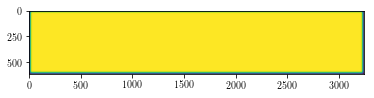

In [18]:
plt.imshow(N_apod*W_apod1_148)

In [19]:
#CMB = ltmap1.data
#CMB_apod = CMB*N_apod

#f = np.sqrt(Nx*Ny)/(np.sqrt(np.sum(np.abs(N_apod)**2)))


#W_L_inv = (1./W_L)
#f = np.sqrt(np.sum(np.abs(CMB)**2)/np.sum(np.abs(CMB_apod)**2))

#CMB_FT = np.fft.fft2(f*CMB_apod)*np.sqrt(FTNM.pixScaleX*FTNM.pixScaleY)/np.sqrt(FTNM.kMap.size)
#CMB_FT = np.fft.fft2(CMB_apod)*np.sqrt(FTNM.pixScaleX*FTNM.pixScaleY)/np.sqrt(FTNM.kMap.size)

#smooth = scipy.ndimage.gaussian_filter(np.abs(np.fft.fftshift(CMB_FT)),sigma=1.0)
#smooth = np.fft.ifftshift(smooth)



In [20]:
#ell, DlTT = np.loadtxt("/home/cvargas/sim_test/camb_12979514_scalcls.dat", usecols=(0, 1), unpack=True)

ell, DlTT = np.loadtxt("/home/cvargas/sim_analysis/COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt",usecols=(0,1),unpack=True)

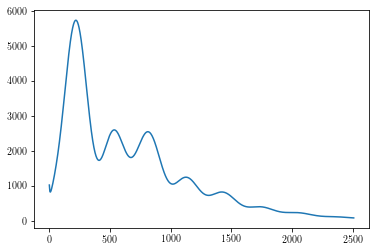

In [21]:
plt.plot(ell,DlTT)

In [22]:
#From DlTT to ClTT

ClTT = DlTT * 2 * np.pi / (ell*(ell+1.))

# set the monopole and the dipole of the Cl spectrum to zero
ell = np.delete(ell,0)
ell = np.delete(ell,0)
ClTT = np.delete(ClTT,0)
ClTT = np.delete(ClTT,0)

#Taking square root, interpolating and applying to modLmap

sClTT = np.sqrt(ClTT)

sCl = scipy.interpolate.InterpolatedUnivariateSpline(ell,sClTT,ext=1.)


ell2 = np.linspace(0.,20000.,100000)
cl2 = sCl(ell2)

In [23]:
Cl_th = scipy.interpolate.InterpolatedUnivariateSpline(ell,ClTT,ext=1.)


In [24]:
# patch1

RA0_1 = 65.
RA1_1 = 85.
DEC0_1 = -55.22
DEC1_1 = -51.15


lt_s1p1_148 = ltmap1_148.selectSubMap(RA0_1,RA1_1,DEC0_1,DEC1_1)
lt_s2p1_148 = ltmap2_148.selectSubMap(RA0_1,RA1_1,DEC0_1,DEC1_1)
lt_s3p1_148 = ltmap3_148.selectSubMap(RA0_1,RA1_1,DEC0_1,DEC1_1)
lt_s4p1_148 = ltmap4_148.selectSubMap(RA0_1,RA1_1,DEC0_1,DEC1_1)

lt_s1p1_218 = ltmap1_218.selectSubMap(RA0_1,RA1_1,DEC0_1,DEC1_1)
lt_s2p1_218 = ltmap2_218.selectSubMap(RA0_1,RA1_1,DEC0_1,DEC1_1)
lt_s3p1_218 = ltmap3_218.selectSubMap(RA0_1,RA1_1,DEC0_1,DEC1_1)
lt_s4p1_218 = ltmap4_218.selectSubMap(RA0_1,RA1_1,DEC0_1,DEC1_1)

mask_p1 = ltmask.selectSubMap(RA0_1,RA1_1,DEC0_1,DEC1_1)


# patch2

RA0_2 = 85
RA1_2 = 105.
DEC0_2 = -55.22
DEC1_2 = -51.15

lt_s1p2_148 =  ltmap1_148.selectSubMap(RA0_2,RA1_2,DEC0_2,DEC1_2)
lt_s2p2_148 =  ltmap2_148.selectSubMap(RA0_2,RA1_2,DEC0_2,DEC1_2)
lt_s3p2_148 =  ltmap3_148.selectSubMap(RA0_2,RA1_2,DEC0_2,DEC1_2)
lt_s4p2_148 =  ltmap4_148.selectSubMap(RA0_2,RA1_2,DEC0_2,DEC1_2)

lt_s1p2_218 =  ltmap1_218.selectSubMap(RA0_2,RA1_2,DEC0_2,DEC1_2)
lt_s2p2_218 =  ltmap2_218.selectSubMap(RA0_2,RA1_2,DEC0_2,DEC1_2)
lt_s3p2_218 =  ltmap3_218.selectSubMap(RA0_2,RA1_2,DEC0_2,DEC1_2)
lt_s4p2_218 =  ltmap4_218.selectSubMap(RA0_2,RA1_2,DEC0_2,DEC1_2)

mask_p2 = ltmask.selectSubMap(RA0_2,RA1_2,DEC0_2,DEC1_2)

# patch3

#RA0_3 = 54.26
#RA1_3 = 78.625
#DEC0_3 = -55.
#DEC1_3 = -50.
#
#lt_s1p3_148 =  ltmap1_148.selectSubMap(RA0_3,RA1_3,DEC0_3,DEC1_3)
#lt_s2p3_148 =  ltmap2_148.selectSubMap(RA0_3,RA1_3,DEC0_3,DEC1_3)
#lt_s3p3_148 =  ltmap3_148.selectSubMap(RA0_3,RA1_3,DEC0_3,DEC1_3)
#lt_s4p3_148 =  ltmap4_148.selectSubMap(RA0_3,RA1_3,DEC0_3,DEC1_3)
#
#lt_s1p3_218 =  ltmap1_218.selectSubMap(RA0_3,RA1_3,DEC0_3,DEC1_3)
#lt_s2p3_218 =  ltmap2_218.selectSubMap(RA0_3,RA1_3,DEC0_3,DEC1_3)
#lt_s3p3_218 =  ltmap3_218.selectSubMap(RA0_3,RA1_3,DEC0_3,DEC1_3)
#lt_s4p3_218 =  ltmap4_218.selectSubMap(RA0_3,RA1_3,DEC0_3,DEC1_3)

#mask_p3 = ltmask.selectSubMap(RA0_3,RA1_3,DEC0_3,DEC1_3)

# patch4

#RA0_4 = 78.625
#RA1_4 = 103.0
#DEC0_4 = -55.
#DEC1_4 = -50.

#lt_s1p4_148 =  ltmap1_148.selectSubMap(RA0_4,RA1_4,DEC0_4,DEC1_4)
#lt_s2p4_148 =  ltmap2_148.selectSubMap(RA0_4,RA1_4,DEC0_4,DEC1_4)
#lt_s3p4_148 =  ltmap3_148.selectSubMap(RA0_4,RA1_4,DEC0_4,DEC1_4)
#lt_s4p4_148 =  ltmap4_148.selectSubMap(RA0_4,RA1_4,DEC0_4,DEC1_4)

#lt_s1p4_218 =  ltmap1_218.selectSubMap(RA0_4,RA1_4,DEC0_4,DEC1_4)
#lt_s2p4_218 =  ltmap2_218.selectSubMap(RA0_4,RA1_4,DEC0_4,DEC1_4)
#lt_s3p4_218 =  ltmap3_218.selectSubMap(RA0_4,RA1_4,DEC0_4,DEC1_4)
#lt_s4p4_218 =  ltmap4_218.selectSubMap(RA0_4,RA1_4,DEC0_4,DEC1_4)

#mask_p4 = ltmask.selectSubMap(RA0_4,RA1_4,DEC0_4,DEC1_4)

In [25]:
Ny,Nx = lt_s1p1_148.data.shape
#taper
pad = 10
extraYPad = 0
apodNy,apodNx = lt_s1p1_148.data.shape
apod = np.zeros((apodNy,apodNx))
apod[pad+extraYPad:apodNy-pad-extraYPad,pad:apodNx-pad] = 1.0
N_apod = scipy.ndimage.gaussian_filter(apod,10,mode="constant")

In [26]:
fnorm1 = np.sqrt(Nx*Ny)/(np.sqrt(np.sum(np.abs(N_apod*mask_p1.data)**2)))
fnorm2 = np.sqrt(Nx*Ny)/(np.sqrt(np.sum(np.abs(N_apod*mask_p2.data)**2)))
#fnorm3 = np.sqrt(Nx*Ny)/(np.sqrt(np.sum(np.abs(N_apod*mask_p3.data)**2)))
#fnorm4 = np.sqrt(Nx*Ny)/(np.sqrt(np.sum(np.abs(N_apod*mask_p4.data)**2)))

In [27]:
#tapering all maps

lt_s1p1_148.data = lt_s1p1_148.data*N_apod*mask_p1.data*fnorm1
lt_s2p1_148.data = lt_s2p1_148.data*N_apod*mask_p1.data*fnorm1
lt_s3p1_148.data = lt_s3p1_148.data*N_apod*mask_p1.data*fnorm1
lt_s4p1_148.data = lt_s4p1_148.data*N_apod*mask_p1.data*fnorm1
lt_s1p2_148.data = lt_s1p2_148.data*N_apod*mask_p2.data*fnorm2
lt_s2p2_148.data = lt_s2p2_148.data*N_apod*mask_p2.data*fnorm2
lt_s3p2_148.data = lt_s3p2_148.data*N_apod*mask_p2.data*fnorm2
lt_s4p2_148.data = lt_s4p2_148.data*N_apod*mask_p2.data*fnorm2
#lt_s1p3_148.data = lt_s1p3_148.data*N_apod*mask_p3.data*fnorm3
#lt_s2p3_148.data = lt_s2p3_148.data*N_apod*mask_p3.data*fnorm3
#lt_s3p3_148.data = lt_s3p3_148.data*N_apod*mask_p3.data*fnorm3
#lt_s4p3_148.data = lt_s4p3_148.data*N_apod*mask_p3.data*fnorm3
#lt_s1p4_148.data = lt_s1p4_148.data*N_apod*mask_p4.data*fnorm4
#lt_s2p4_148.data = lt_s2p4_148.data*N_apod*mask_p4.data*fnorm4
#lt_s3p4_148.data = lt_s3p4_148.data*N_apod*mask_p4.data*fnorm4
#lt_s4p4_148.data = lt_s4p4_148.data*N_apod*mask_p4.data*fnorm4


lt_s1p1_218.data = lt_s1p1_218.data*N_apod*mask_p1.data*fnorm1
lt_s2p1_218.data = lt_s2p1_218.data*N_apod*mask_p1.data*fnorm1
lt_s3p1_218.data = lt_s3p1_218.data*N_apod*mask_p1.data*fnorm1
lt_s4p1_218.data = lt_s4p1_218.data*N_apod*mask_p1.data*fnorm1
lt_s1p2_218.data = lt_s1p2_218.data*N_apod*mask_p2.data*fnorm2
lt_s2p2_218.data = lt_s2p2_218.data*N_apod*mask_p2.data*fnorm2
lt_s3p2_218.data = lt_s3p2_218.data*N_apod*mask_p2.data*fnorm2
lt_s4p2_218.data = lt_s4p2_218.data*N_apod*mask_p2.data*fnorm2
#lt_s1p3_218.data = lt_s1p3_218.data*N_apod*mask_p3.data*fnorm3
#lt_s2p3_218.data = lt_s2p3_218.data*N_apod*mask_p3.data*fnorm3
#lt_s3p3_218.data = lt_s3p3_218.data*N_apod*mask_p3.data*fnorm3
#lt_s4p3_218.data = lt_s4p3_218.data*N_apod*mask_p3.data*fnorm3
#lt_s1p4_218.data = lt_s1p4_218.data*N_apod*mask_p4.data*fnorm4
#lt_s2p4_218.data = lt_s2p4_218.data*N_apod*mask_p4.data*fnorm4
#lt_s3p4_218.data = lt_s3p4_218.data*N_apod*mask_p4.data*fnorm4
#lt_s4p4_218.data = lt_s4p4_218.data*N_apod*mask_p4.data*fnorm4

In [28]:
FTNM_map = fftTools.fftFromLiteMap(lt_s1p1_148)


In [29]:
modL = FTNM_map.modLMap

In [30]:
#cross

def cross_power(map1,map2):
    FTNM_map1 = fftTools.fftFromLiteMap(map1)
    FTNM_map2 = fftTools.fftFromLiteMap(map2)
    FT1 = np.fft.fft2(map1.data)*np.sqrt(FTNM_map1.pixScaleX*FTNM_map1.pixScaleY)/np.sqrt(FTNM_map1.kMap.size)
    FT2 = np.fft.fft2(map2.data)*np.sqrt(FTNM_map2.pixScaleX*FTNM_map2.pixScaleY)/np.sqrt(FTNM_map2.kMap.size)
    power = np.real(FT2*np.conjugate(FT1))
    return power
    
def auto_power(map1):
    map2 = map1.copy()
    FTNM_map = fftTools.fftFromLiteMap(map2)
    FT = np.fft.fft2(map2.data)*np.sqrt(FTNM_map.pixScaleX*FTNM_map.pixScaleY)/np.sqrt(FTNM_map.kMap.size)
    power = np.abs(FT)**2
    return power


In [31]:
#cross spectras (12 per patch)

#patch1

p1_12 = cross_power(lt_s1p1_148,lt_s2p1_218)
p1_13 = cross_power(lt_s1p1_148,lt_s3p1_218)
p1_14 = cross_power(lt_s1p1_148,lt_s4p1_218)
p1_21 = cross_power(lt_s2p1_148,lt_s1p1_218)
p1_23 = cross_power(lt_s2p1_148,lt_s3p1_218)
p1_24 = cross_power(lt_s2p1_148,lt_s4p1_218)
p1_31 = cross_power(lt_s3p1_148,lt_s1p1_218)
p1_32 = cross_power(lt_s3p1_148,lt_s2p1_218)
p1_34 = cross_power(lt_s3p1_148,lt_s4p1_218)
p1_41 = cross_power(lt_s4p1_148,lt_s1p1_218)
p1_42 = cross_power(lt_s4p1_148,lt_s2p1_218)
p1_43 = cross_power(lt_s4p1_148,lt_s3p1_218)

mean1 = (p1_12+p1_13+p1_14+p1_21+p1_23+p1_24+p1_31+p1_32+p1_34+p1_41+p1_42+p1_43)/12.

#patch2

p2_12 = cross_power(lt_s1p2_148,lt_s2p2_218)
p2_13 = cross_power(lt_s1p2_148,lt_s3p2_218)
p2_14 = cross_power(lt_s1p2_148,lt_s4p2_218)
p2_21 = cross_power(lt_s2p2_148,lt_s1p2_218)
p2_23 = cross_power(lt_s2p2_148,lt_s3p2_218)
p2_24 = cross_power(lt_s2p2_148,lt_s4p2_218)
p2_31 = cross_power(lt_s3p2_148,lt_s1p2_218)
p2_32 = cross_power(lt_s3p2_148,lt_s2p2_218)
p2_34 = cross_power(lt_s3p2_148,lt_s4p2_218)
p2_41 = cross_power(lt_s4p2_148,lt_s1p2_218)
p2_42 = cross_power(lt_s4p2_148,lt_s2p2_218)
p2_43 = cross_power(lt_s4p2_148,lt_s3p2_218)

mean2 = (p2_12+p2_13+p2_14+p2_21+p2_23+p2_24+p2_31+p2_32+p2_34+p2_41+p2_42+p2_43)/12.

#patch3

#p3_12 = cross_power(lt_s1p3_148,lt_s2p3_218)
#p3_13 = cross_power(lt_s1p3_148,lt_s3p3_218)
#p3_14 = cross_power(lt_s1p3_148,lt_s4p3_218)
#p3_21 = cross_power(lt_s2p3_148,lt_s1p3_218)
#p3_23 = cross_power(lt_s2p3_148,lt_s3p3_218)
#p3_24 = cross_power(lt_s2p3_148,lt_s4p3_218)
#p3_31 = cross_power(lt_s3p3_148,lt_s1p3_218)
#p3_32 = cross_power(lt_s3p3_148,lt_s2p3_218)
#p3_34 = cross_power(lt_s3p3_148,lt_s4p3_218)
#p3_41 = cross_power(lt_s4p3_148,lt_s1p3_218)
#p3_42 = cross_power(lt_s4p3_148,lt_s2p3_218)
#p3_43 = cross_power(lt_s4p3_148,lt_s3p3_218)
#
#mean3 = (p3_12+p3_13+p3_14+p3_21+p3_23+p3_24+p3_31+p3_32+p3_34+p3_41+p3_42+p3_43)/12.


#patch4

#p4_12 = cross_power(lt_s1p4_148,lt_s2p4_218)
#p4_13 = cross_power(lt_s1p4_148,lt_s3p4_218)
#p4_14 = cross_power(lt_s1p4_148,lt_s4p4_218)
#p4_21 = cross_power(lt_s2p4_148,lt_s1p4_218)
#p4_23 = cross_power(lt_s2p4_148,lt_s3p4_218)
#p4_24 = cross_power(lt_s2p4_148,lt_s4p4_218)
#p4_31 = cross_power(lt_s3p4_148,lt_s1p4_218)
#p4_32 = cross_power(lt_s3p4_148,lt_s2p4_218)
#p4_34 = cross_power(lt_s3p4_148,lt_s4p4_218)
#p4_41 = cross_power(lt_s4p4_148,lt_s1p4_218)
#p4_42 = cross_power(lt_s4p4_148,lt_s2p4_218)
#p4_43 = cross_power(lt_s4p4_148,lt_s3p4_218)
#
#mean4 = (p4_12+p4_13+p4_14+p4_21+p4_23+p4_24+p4_31+p4_32+p4_34+p4_41+p4_42+p4_43)/12.


In [32]:
#mean cross

mean_power = (mean1+mean2)/2.

In [33]:
#mean noise = mean_cross - mean_auto


#148 
#mean_cross

#cross spectras (6 per patch)

#patch1

p1_12 = cross_power(lt_s1p1_148,lt_s2p1_148)
p1_13 = cross_power(lt_s1p1_148,lt_s3p1_148)
p1_14 = cross_power(lt_s1p1_148,lt_s4p1_148)
p1_23 = cross_power(lt_s2p1_148,lt_s3p1_148)
p1_24 = cross_power(lt_s2p1_148,lt_s4p1_148)
p1_34 = cross_power(lt_s3p1_148,lt_s4p1_148)

mean1 = (p1_12+p1_13+p1_14+p1_23+p1_24+p1_34)/6.

#patch2

p2_12 = cross_power(lt_s1p2_148,lt_s2p2_148)
p2_13 = cross_power(lt_s1p2_148,lt_s3p2_148)
p2_14 = cross_power(lt_s1p2_148,lt_s4p2_148)
p2_23 = cross_power(lt_s2p2_148,lt_s3p2_148)
p2_24 = cross_power(lt_s2p2_148,lt_s4p2_148)
p2_34 = cross_power(lt_s3p2_148,lt_s4p2_148)

mean2 = (p2_12+p2_13+p2_14+p2_23+p2_24+p2_34)/6.

#patch3

#p3_12 = cross_power(lt_s1p3_148,lt_s2p3_148)
#p3_13 = cross_power(lt_s1p3_148,lt_s3p3_148)
#p3_14 = cross_power(lt_s1p3_148,lt_s4p3_148)
#p3_23 = cross_power(lt_s2p3_148,lt_s3p3_148)
#p3_24 = cross_power(lt_s2p3_148,lt_s4p3_148)
#p3_34 = cross_power(lt_s3p3_148,lt_s4p3_148)
#
#mean3 = (p3_12+p3_13+p3_14+p3_23+p3_24+p3_34)/6.

#patch4

#p4_12 = cross_power(lt_s1p4_148,lt_s2p4_148)
#p4_13 = cross_power(lt_s1p4_148,lt_s3p4_148)
#p4_14 = cross_power(lt_s1p4_148,lt_s4p4_148)
#p4_23 = cross_power(lt_s2p4_148,lt_s3p4_148)
#p4_24 = cross_power(lt_s2p4_148,lt_s4p4_148)
#p4_34 = cross_power(lt_s3p4_148,lt_s4p4_148)

#mean4 = (p4_12+p4_13+p4_14+p4_23+p4_24+p4_34)/6.

mean_cross = (mean1+mean2)/2.

# mean auto

p1_11 = auto_power(lt_s1p1_148)
p2_22 = auto_power(lt_s2p2_148)
#p3_33 = auto_power(lt_s3p3_148)
#p4_44 = auto_power(lt_s4p4_148)

mean_auto = (p1_11+p2_22)/2.

noise_148 = mean_auto - mean_cross

#del mean_auto, mean_cross, p1_12, p1_13, p1_14, p1_23, p1_34, p2_12, p2_13, p2_14, p2_23, p2_34
#del p3_12, p3_13, p3_14, p3_23, p3_34, p4_12, p4_13, p4_14, p4_23, p4_34

In [34]:
ellMin = 400.
ellxMin = 100.
#ellMax = 10000.
FTNM = fftTools.fftFromLiteMap(lt_s1p1_148)
lmask = np.ones(FTNM.modLMap.shape)
lmask[FTNM.modLMap <ellMin] = 0.
lmask[:, np.abs(FTNM.lx) < ellxMin] = 0.
#lmask[FTNM.modLMap >ellMax] = 0.

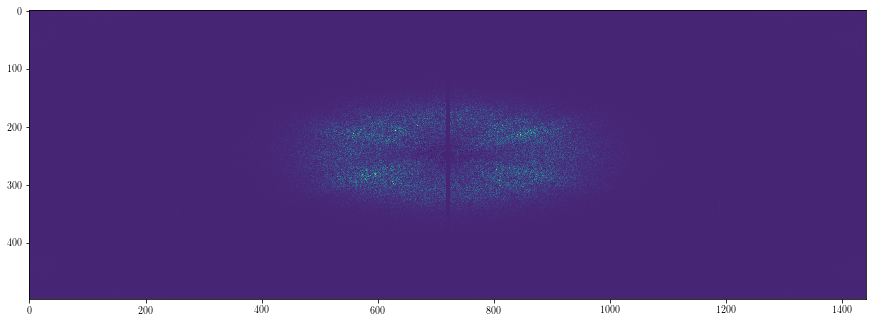

In [35]:
plt.figure(figsize=(15,15))
plt.imshow(np.fft.fftshift(noise_148*lmask))

In [36]:

#218
#mean_cross

#cross spectras (6 per patch)

#patch1

p1_12 = cross_power(lt_s1p1_218,lt_s2p1_218)
p1_13 = cross_power(lt_s1p1_218,lt_s3p1_218)
p1_14 = cross_power(lt_s1p1_218,lt_s4p1_218)
p1_23 = cross_power(lt_s2p1_218,lt_s3p1_218)
p1_24 = cross_power(lt_s2p1_218,lt_s4p1_218)
p1_34 = cross_power(lt_s3p1_218,lt_s4p1_218)

mean1 = (p1_12+p1_13+p1_14+p1_23+p1_24+p1_34)/6.

#patch2

p2_12 = cross_power(lt_s1p2_218,lt_s2p2_218)
p2_13 = cross_power(lt_s1p2_218,lt_s3p2_218)
p2_14 = cross_power(lt_s1p2_218,lt_s4p2_218)
p2_23 = cross_power(lt_s2p2_218,lt_s3p2_218)
p2_24 = cross_power(lt_s2p2_218,lt_s4p2_218)
p2_34 = cross_power(lt_s3p2_218,lt_s4p2_218)

mean2 = (p2_12+p2_13+p2_14+p2_23+p2_24+p2_34)/6.

#patch3

#p3_12 = cross_power(lt_s1p3_218,lt_s2p3_218)
#p3_13 = cross_power(lt_s1p3_218,lt_s3p3_218)
#p3_14 = cross_power(lt_s1p3_218,lt_s4p3_218)
#p3_23 = cross_power(lt_s2p3_218,lt_s3p3_218)
#p3_24 = cross_power(lt_s2p3_218,lt_s4p3_218)
#p3_34 = cross_power(lt_s3p3_218,lt_s4p3_218)

#mean3 = (p3_12+p3_13+p3_14+p3_23+p3_24+p3_34)/6.

#patch4

#p4_12 = cross_power(lt_s1p4_218,lt_s2p4_218)
#p4_13 = cross_power(lt_s1p4_218,lt_s3p4_218)
#p4_14 = cross_power(lt_s1p4_218,lt_s4p4_218)
#p4_23 = cross_power(lt_s2p4_218,lt_s3p4_218)
#p4_24 = cross_power(lt_s2p4_218,lt_s4p4_218)
#p4_34 = cross_power(lt_s3p4_218,lt_s4p4_218)

#mean4 = (p4_12+p4_13+p4_14+p4_23+p4_24+p4_34)/6.

mean_cross = (mean1+mean2)/2.

# mean auto

p1_11 = auto_power(lt_s1p1_218)
p2_22 = auto_power(lt_s2p2_218)
#p3_33 = auto_power(lt_s3p3_218)
#p4_44 = auto_power(lt_s4p4_218)

mean_auto = (p1_11+p2_22)/2.

noise_218 = mean_auto - mean_cross

#del mean_auto, mean_cross, p1_12, p1_13, p1_14, p1_23, p1_34, p2_12, p2_13, p2_14, p2_23, p2_34
#del p3_12, p3_13, p3_14, p3_23, p3_34, p4_12, p4_13, p4_14, p4_23, p4_34

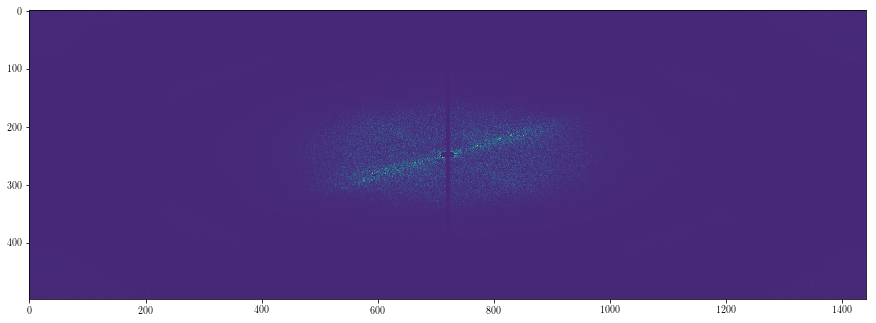

In [37]:
plt.figure(figsize=(15,15))
plt.imshow(np.fft.fftshift(noise_218*lmask))

In [38]:
ellMin = 400.
ellxMin = 100.
#ellMax = 10000.
FTNM = fftTools.fftFromLiteMap(lt_s1p1_148)
lmask = np.ones(FTNM.modLMap.shape)
lmask[FTNM.modLMap <ellMin] = 0.
lmask[:, np.abs(FTNM.lx) < ellxMin] = 0.
#lmask[FTNM.modLMap >ellMax] = 0.

In [39]:
%matplotlib inline

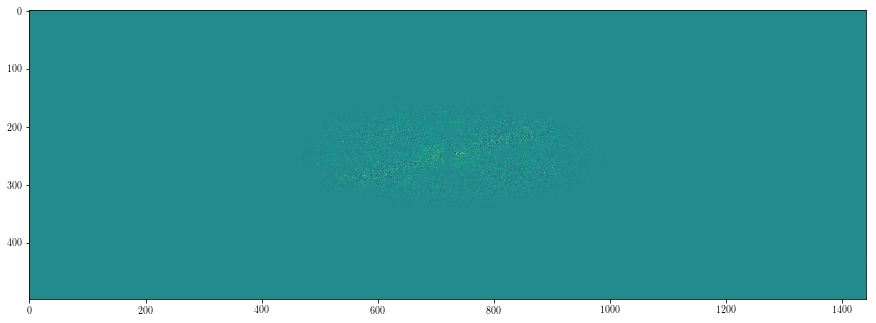

In [40]:
plt.figure(figsize=(15,15))
plt.imshow(np.fft.fftshift(mean_power*lmask))

In [41]:
#plt.figure(figsize=(15,15))
#plt.imshow(np.fft.fftshift(auto_power*lmask))

In [42]:
#plt.figure(figsize=(15,15))
#plt.imshow(np.fft.fftshift(noise_power*lmask))

In [43]:
th_CMB = sCl(FTNM.modLMap)

In [44]:
#plt.figure(figsize=(15,10))
#plt.imshow(np.fft.fftshift(th_CMB*lmask))

In [45]:
Bspl_148 = cactusBeams.getBeamSpline("/home/cvargas/data/act/act_depots/cactus_depots/20180419/Beam_AR1_2008_planetmap_J25_dustsync_180423_transform.txt")
Bspl_218 = cactusBeams.getBeamSpline("/home/cvargas/data/act/act_depots/cactus_depots/20180419/Beam_AR3_2010_planetmap_J25_dustsync_180423_transform.txt")

In [46]:
beam_kk_148 = Bspl_148(FTNM.modLMap)
beam_kk_218 = Bspl_218(FTNM.modLMap)

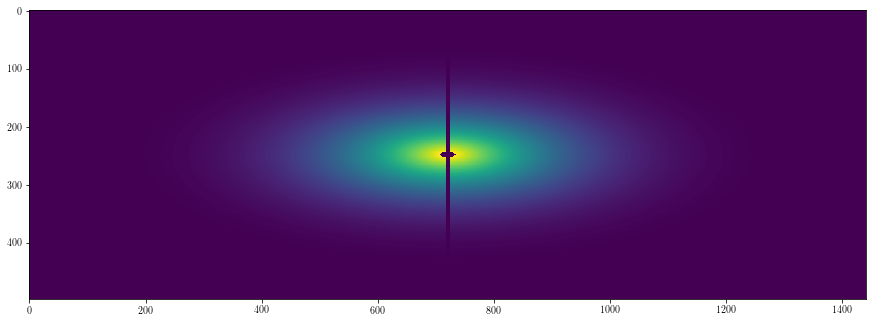

In [47]:
plt.figure(figsize=(15,10))
plt.imshow(np.fft.fftshift(beam_kk_148*beam_kk_218*lmask))

In [48]:
#variance spectral estimator

sigma_Cl = (th_CMB*beam_kk_148+noise_148/4.)*(th_CMB*beam_kk_218+noise_218/4.)


In [49]:
#sgma_Cl = sigma_Cl * 0.+1.

In [50]:
from scipy import ndimage

In [51]:
#smooth of sigma_Cl

gFilterSigma = 10.

sigma = np.array([1./FTNM.ly[1], 1./FTNM.lx[1]], dtype=float) * gFilterSigma
smooth = ndimage.gaussian_filter(np.fft.fftshift(sigma_Cl), sigma=sigma)
sigma_Cl_smooth = np.fft.ifftshift(smooth)



In [52]:
#azimuthal weights = inverse of the variance

w_l = 1./sigma_Cl_smooth

In [53]:
w_l = w_l*0.+1.

In [54]:
mean_power *= lmask

In [55]:
FTNM_map.kMap = mean_power


In [56]:
#das bins 

#bins = [490.,540.,590.,640.,690.,740.,790.,840.,890.,940.,990.,1040.,1090.,1140.,1190.,1240.,1290.,
#       1340.,1390.,1440.,1490.,1540.,1590.,1640.,1690.,1740.,1790.,1840.,1890.,1940.,1990.,2040.,
#       2090.,2140.,2190.,2240.,2290.,2340.,2390.,2700.]
#bins = np.asarray(bins)

In [57]:
#long bins
#bins = np.linspace(450.,2550.,22)

#bins = np.linspace(500.,2600.,22)

bins = np.linspace(450.,2550.,22)

In [58]:
bins

array([ 450.,  550.,  650.,  750.,  850.,  950., 1050., 1150., 1250.,
       1350., 1450., 1550., 1650., 1750., 1850., 1950., 2050., 2150.,
       2250., 2350., 2450., 2550.])

In [59]:
initial = bins[0]-100.
final = bins[-1]+100.
wbins = np.concatenate(([initial],bins,[final]))

In [60]:
wbins

array([ 350.,  450.,  550.,  650.,  750.,  850.,  950., 1050., 1150.,
       1250., 1350., 1450., 1550., 1650., 1750., 1850., 1950., 2050.,
       2150., 2250., 2350., 2450., 2550., 2650.])

In [61]:
#lmask = np.ones(FTNM.modLMap.shape)
#lmask[FTNM.modLMap <ellMin] = 0.
#lmask[:, np.abs(FTNM.lx) < ellxMin] = 0.
#lmask[FTNM.modLMap >ellMax] = 0.

In [62]:
bins[3]

750.0

In [63]:
#lmring = np.ones(FTNM.modLMap.shape)
#lmring[FTNM.modLMap <bins[i]] = 0.
#lmring[FTNM.modLMap >bins[i+1]] = 0.
#boolring = np.asarray(lmring,dtype=bool)
#
#ring0 = w_l*lmring
#
#ring_data = w_l[boolring]
#
#ing0[ring0>10.*np.mean(ring_data)] = 10.*np.mean(ring_data)
#
#ing0 /= np.mean(ring_data)

In [64]:
#making the weights for binning


#Rings = []
#
#for i in range(len(wbins)-1):
#    lmring = np.ones(FTNM.modLMap.shape)
#    lmring[FTNM.modLMap <wbins[i]] = 0.
#    lmring[FTNM.modLMap >wbins[i+1]] = 0.
#    boolring = np.asarray(lmring,dtype=bool)
#    
#    ring0 = w_l*lmring
#    
#    ring_data = w_l[boolring]
#    
#    ring0[ring0>10.*np.mean(ring_data)] = 10.*np.mean(ring_data)
#    
#    ring0 /= np.mean(ring_data)
#    
#    Rings.append(ring0)

In [65]:
#wlmap = Rings[0]*0.+0.
#
#for ring in Rings:
#    wlmap += ring

In [66]:
from scipy import ndimage

In [67]:
#gFilterSigma = 15.
#
#sigma = np.array([1./FTNM.ly[1], 1./FTNM.lx[1]], dtype=float) * gFilterSigma
#smooth = ndimage.gaussian_filter(np.fft.fftshift(mean_power), sigma=sigma)
#mean_power_smooth = np.fft.ifftshift(smooth)
#
#mean_power = mean_power_smooth

In [68]:
#Cl = []
#ell = []
#
#errCl = []
#
#Rings = []
#RRings = []
#
#for i in range(len(bins)-1):
#    c1 = modL>bins[i]
#    c2 = modL<bins[i+1]
#    c = c1.astype(int)*c2.astype(int)
#    c = c.astype(bool)
#    #Clbin = np.mean(smooth[c])
#    #CMB_FT_abs = np.abs(CMB_FT)
#    
#    ring = mean_power[c]
#    rr = []
#    for n in ring:
#        if n!=0.:
#            rr.append(n)
#    rr = np.asarray(rr)
#    
#    #Clbin = np.mean(mean_power[c])
#    #Clbin = np.median(rr)
#    Clbin = np.mean(rr)
#    #lbin = np.mean(modL[c])
#    lbin = np.mean([bins[i],bins[i+1]])
#    N = len(mean_power[c])/4.
#    errClbin = np.std(mean_power[c])/np.sqrt(N)
#    #lbin = np.mean([bins[i],bins[i+1]])
#    #print lbin
#    Cl.append(Clbin)
#    ell.append(lbin)
#    errCl.append(errClbin)
#    Rings.append(ring)
#    RRings.append(rr)

In [69]:
Nl148 = []
Nl218 = []
numbin = []
Cl = []
ell = []

#errCl = []

Rings = []
RRings = []

for i in range(len(bins)-1):
    c1 = modL>bins[i]
    c2 = modL<bins[i+1]
    c = c1.astype(int)*c2.astype(int)
    c = c.astype(bool)
    #Clbin = np.mean(smooth[c])
    #CMB_FT_abs = np.abs(CMB_FT)
    
    wring = w_l[c]
    
    ring = mean_power[c]
    
    nring148 = noise_148[c]
    nring218 = noise_218[c]
    
    rr = []
    wrr = []
    
    nrr148 = []
    nrr218 = []
    
    for j in range(len(ring)):
        if ring[j]!=0.:
            rr.append(ring[j])
            wrr.append(wring[j])
            nrr148.append(nring148[j])
            nrr218.append(nring218[j])
    rr = np.asarray(rr)
    wrr = np.asarray(wrr)
    nrr148 = np.asarray(nrr148)
    nrr218 = np.asarray(nrr218)
    #centered = rr-np.mean(rr)
    #std = np.std(centered)
    #
    #rr2 = []
    #
    #for j in range(len(rr)):
    #    if np.abs(centered[j])<10*std:
    #        rr2.append(rr[j])
    #    else:
    #        print "reject"
    
    #Clbin = np.mean(mean_power[c])
    
    
    #rr2 = np.asarray(rr2)
    
    nbin = len(wrr)
    #Clbin = np.mean(rr)
    #Clbin = np.mean(rr2)
    
    Clbin = np.sum(rr*wrr)/np.sum(wrr)
    
    Nlbin148 = np.sum(nrr148*wrr)/np.sum(wrr)
    Nlbin218 = np.sum(nrr218*wrr)/np.sum(wrr)
    
    #lbin = np.mean(modL[c])
    lbin = np.mean([bins[i],bins[i+1]])
    
    #N = len(mean_power[c])/4.
    
    #errClbin = np.std(mean_power[c])/np.sqrt(N)
    #errClbin = np.mean(sigma_Cl_smooth[c])
    
    
    #lbin = np.mean([bins[i],bins[i+1]])
    #print lbin
    Nl148.append(Nlbin148)
    Nl218.append(Nlbin218)
    Cl.append(Clbin)
    ell.append(lbin)
    numbin.append(nbin)
    #errCl.append(errClbin)
    Rings.append(ring)
    RRings.append(rr)

In [70]:
Cl

[0.00011507332926799194,
 0.00010840775253399014,
 0.00010621701364650923,
 0.00010807580464136008,
 9.259059963960435e-05,
 5.6863477140268865e-05,
 4.651231627405174e-05,
 6.108516837275752e-05,
 7.895119782910672e-05,
 7.568876930201304e-05,
 5.841318488102184e-05,
 4.228459261878777e-05,
 5.458572458872424e-05,
 4.486919576446442e-05,
 3.475441242899545e-05,
 4.620355219782086e-05,
 2.6860876537628634e-05,
 3.0127746162278155e-05,
 1.889656266507667e-05,
 1.6347614009039245e-05,
 2.962763599424202e-05]

In [71]:
Cl

[0.00011507332926799194,
 0.00010840775253399014,
 0.00010621701364650923,
 0.00010807580464136008,
 9.259059963960435e-05,
 5.6863477140268865e-05,
 4.651231627405174e-05,
 6.108516837275752e-05,
 7.895119782910672e-05,
 7.568876930201304e-05,
 5.841318488102184e-05,
 4.228459261878777e-05,
 5.458572458872424e-05,
 4.486919576446442e-05,
 3.475441242899545e-05,
 4.620355219782086e-05,
 2.6860876537628634e-05,
 3.0127746162278155e-05,
 1.889656266507667e-05,
 1.6347614009039245e-05,
 2.962763599424202e-05]

In [72]:
np.mean(rr)

2.962763599424202e-05

In [73]:
wrr

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [74]:
rr

array([-2.69674154e-05, -8.40015114e-05,  9.99972897e-05,  9.99972897e-05,
       -8.40015114e-05, -2.69674154e-05,  5.99364066e-05,  1.09305425e-04,
        7.05165096e-05,  2.71174928e-05,  1.13273024e-04,  7.67976375e-05,
        1.33528507e-04,  1.57484724e-04,  9.11866518e-05, -1.31028773e-04,
        1.63077541e-04,  2.26625029e-04,  3.52692954e-06,  1.76565326e-04,
        8.63232181e-05,  8.46356067e-05,  1.82852481e-04,  2.22432885e-05,
        6.85474486e-06,  4.89896511e-05,  7.33323781e-05,  1.23860299e-04,
        1.05496832e-04,  1.63992180e-04, -1.83220856e-05,  2.44725057e-04,
       -1.51199675e-05, -7.66429498e-07,  4.11680879e-05,  6.07115219e-05,
        9.51598761e-05, -1.02630958e-05,  4.05842987e-05,  9.97533488e-07,
        1.24743536e-04,  1.78889737e-04, -1.09240498e-05, -1.09794516e-05,
        5.14772270e-05,  1.82893375e-04,  7.44224943e-05,  3.07205039e-05,
       -4.63126272e-05,  2.10814337e-05,  1.03405702e-04,  9.29729961e-06,
        2.70060806e-05,  

In [75]:
Cl = np.asarray(Cl)
ell = np.asarray(ell)
Nl148 = np.asarray(Nl148)
Nl218 = np.asarray(Nl218)
numbin = np.asarray(numbin)

In [76]:
numbin

array([104, 126, 154, 172, 198, 206, 252, 270, 290, 316, 342, 358, 384,
       398, 438, 452, 490, 502, 536, 546, 562])

In [77]:
#correction by prewithening

corr_Nl148 = pw1_148_proc.correctSpectrum(ell,Nl148)
corr_Nl218 = pw1_148_proc.correctSpectrum(ell,Nl218)

corr_Cl = pw1_148_proc.correctSpectrum(ell,Cl) #corrected Cl 
sqCl = np.sqrt(corr_Cl) #square root of the Cl

In [78]:
ell_b = np.linspace(5.0,5000.)
B_ell_b_148 = Bspl_148(ell_b)
B_ell_b_218 = Bspl_218(ell_b)




In [79]:
corr_beam = (1./np.sqrt(B_ell_b_148*B_ell_b_218))

(500.0, 5000.0)

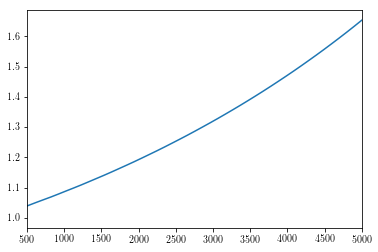

In [80]:
plt.plot(ell_b,corr_beam)
plt.xlim(500.,5000.)

In [81]:
#correction by beam window function

B_ell_148 = Bspl_148(ell)
B_ell_218 = Bspl_218(ell)

corr_beam = (1./np.sqrt(B_ell_148*B_ell_218))

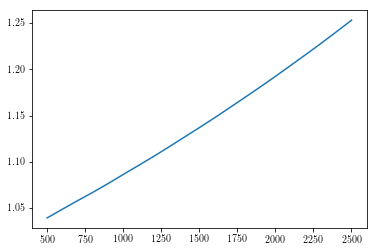

In [82]:
plt.plot(ell,corr_beam)

In [83]:
#tf = np.array([1.15310471, 1.16905901, 1.1299055 , 1.14181984, 1.11623306,
#       1.08855217, 1.16007095, 1.12186964, 1.12793505, 1.1496227 ,
#       1.10008006, 1.08402122, 1.1035432 , 1.1485391 , 1.09745488,
#       1.13093116, 1.11551442, 1.10504099, 1.12038898, 1.13076779])

In [84]:
#tf = np.array([1.59160428, 1.56209718, 1.55136019, 1.590948  , 1.56801631,
#       1.54208868, 1.58392801, 1.57004787, 1.5579863 , 1.59767127,
#       1.57750359, 1.55004574, 1.58598399, 1.57698915, 1.56718438,
#       1.58844255, 1.58165629, 1.55944037, 1.58672238, 1.58348917])

In [85]:
#f = 1.0391366389411163 #normalization factor from windowing

In [86]:
errCl = np.sqrt((Cl_th(ell)*Bspl_148(ell)**2+corr_Nl148/2.)*(Cl_th(ell)*Bspl_218(ell)**2+corr_Nl218/2.))/np.sqrt(numbin)

In [87]:
#Cl0 = pwCl*corr_beam

#Cl0 = np.sqrt(tf)*pwCl*corr_beam

sqCl0 = sqCl*corr_beam  # square root of Cl corrected using 1/beam
                        # i.e. power spectrum uses 1/beam**2

(0.0, 0.3)

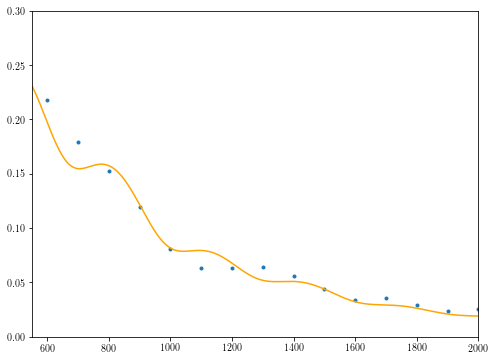

In [88]:
plt.figure(figsize=(8,6))
#plt.plot(ell,Cl,"r.")


plt.plot(ell,sqCl0,".")

plt.plot(ell2,cl2,color="orange")

plt.xlim(550.,2000.)
plt.ylim(0.,0.3)

In [89]:
#errCl*ell*(ell+1.)/(2.*np.pi)

In [90]:
#errCl*ell*(ell+1.)/(2.*np.pi)

Text(0.5,0,'$\\ell$')

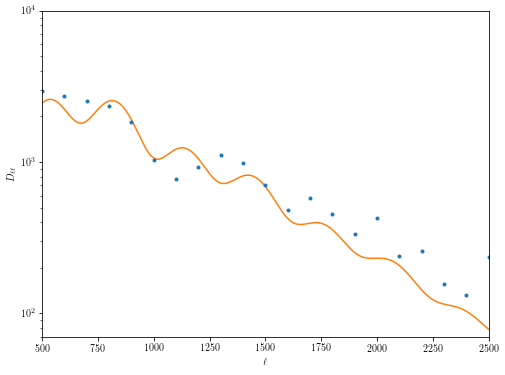

In [91]:
plt.figure(figsize=(8,6))

Dll = sqCl0**2*ell*(ell+1.)/(2.*np.pi)
#errDll = errCl*ell*(ell+1.)/(2.*np.pi)

plt.errorbar(ell,Dll,fmt=".")

#plt.errorbar(ell,Dll,yerr=errDll,fmt=".")

plt.plot(ell2,cl2**2*ell2*(ell2+1.)/(2.*np.pi))

#CMB_FT_abs[c]

plt.xlim(500.,2500.)
#plt.ylim(0.,0.3)

plt.yscale("log")

plt.ylim(70.,10**4)

plt.ylabel(r"$D_{\ell\ell}$")

plt.xlabel(r"$\ell$")

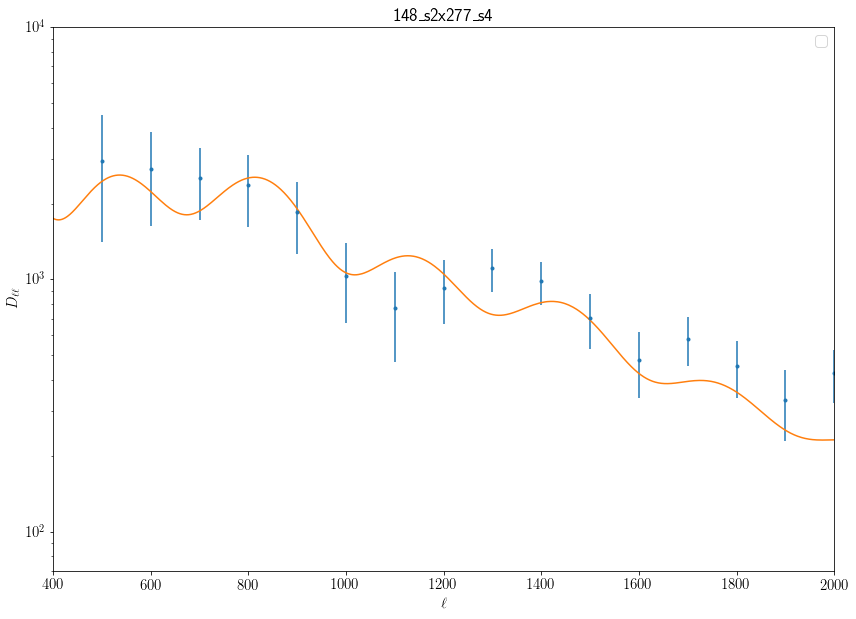

In [92]:

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(14,10))


Dll = sqCl0**2*ell*(ell+1.)/(2.*np.pi)
errDll = errCl*ell*(ell+1.)/(2.*np.pi)

#plt.errorbar(ell,Dll,fmt=".")

plt.errorbar(ell,Dll,yerr=errDll,fmt=".")

plt.plot(ell2,cl2**2*ell2*(ell2+1.)/(2.*np.pi))

#CMB_FT_abs[c]

plt.xlim(400.,2000.)
#plt.ylim(0.,0.3)

plt.yscale("log")

plt.ylim(70.,10**4)

plt.ylabel(r"$D_{ \ell \ell}$")

plt.xlabel(r"$\ell$")

plt.legend()

plt.title("148\_s2x277\_s4")

plt.savefig("148_s2x277_s4_reduc.png",dpi=300)



In [93]:
nfile = "148_s2x277_s4_reduc.txt"

with open(nfile,"w") as f:
    f.write("#ell Dll errDll\n")
    for i in range(len(ell)):
        f.write("{} {} {}\n".format(ell[i],Dll[i],errDll[i]))


In [94]:
#Das

ell_b = [515.,565.,615.,665.,715.,765.,815.,865.,915.,965.,1015.,1065.,1115.,1165.,1215.,1265.,
         1315.,1365.,1415.,1465.,1515.,1565.,1615.,1665.,1715.,1765.,1815.,1865.,1915.,1965.,
         2015.,2065.,2115.,2165.,2215.,2265.,2315.,2365.,2550.]

Cl_b = [2423.,2701.4,1952.1,1701.9,1895.7,2386.5,2415.5,2168.0,1567.5,1353.6,976.0,1089.5,1229.6,
       1169.7,861.9,819.3,740.8,746.8,782.4,718.8,619.3,495.6,467.4,380.4,351.6,359.6,334.4,274.8,226.3,
       259.7,235.8,242.8,168.8,164.7,152.2,132.2,114.9,106.3,82.9]

sigma_b = [270.8,274.8,205.4,167.7,179.5,202.0,200.5,178.2,138.3,109.9,89.2,92.9,100.2,88.2,73.4,68.7,
          60.6,60.5,64.4,55.8,50.1,44.5,38.8,34.0,33.6,32.3,29.4,25.3,23.3,23.1,21.6,22.8,18.6,17.8,
          17.2,15.8,14.7,15.4,5.4] 

In [95]:
Cl_b = np.asarray(Cl_b)
ell_b = np.asarray(ell_b)
sigma_b = np.asarray(sigma_b)

Text(0.5,0,'$\\ell$')

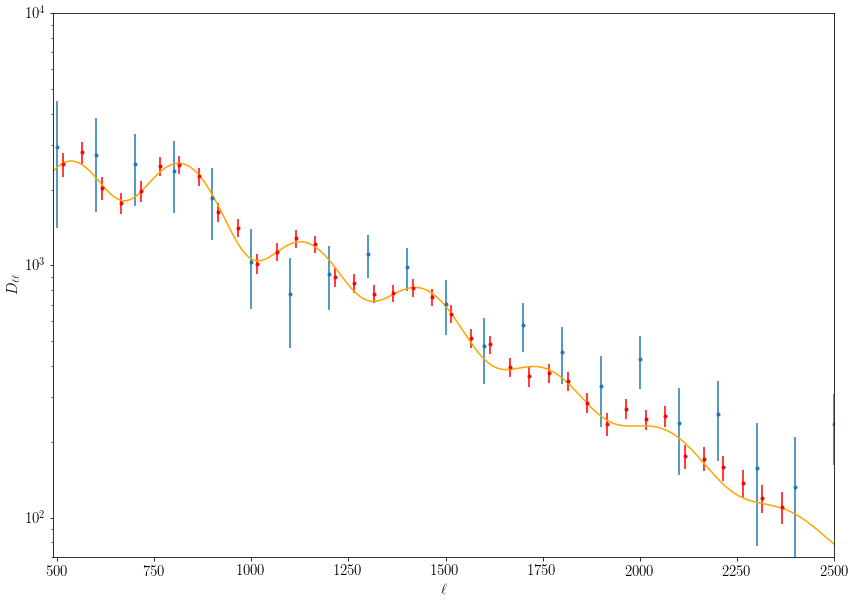

In [96]:
plt.figure(figsize=(14,10))

plt.errorbar(ell_b,(1.02**2)*Cl_b,yerr=(1.02**2)*sigma_b,fmt=".",color="red")

plt.errorbar(ell,Dll,yerr=errDll,fmt=".")

plt.plot(ell2,cl2**2*ell2*(ell2+1.)/(2.*np.pi),color="orange")

plt.xlim(490.,2500.)
#plt.ylim(0.,0.3)

plt.yscale("log")

plt.ylim(70.,10**4)

plt.ylabel(r"$D_{\ell\ell}$")

plt.xlabel(r"$\ell$")

Text(0.5,0,'$\\ell$')

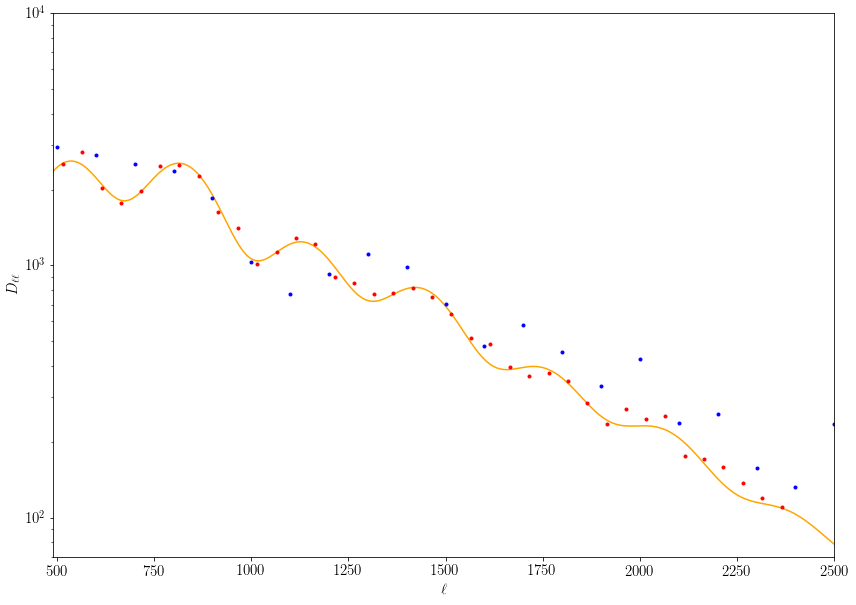

In [97]:
plt.figure(figsize=(14,10))

plt.errorbar(ell_b,(1.02**2)*Cl_b,fmt=".",color="red")

#plt.errorbar(ell,Dll,fmt=".",color="blue")

plt.errorbar(ell,Dll,fmt=".",color="blue")

plt.plot(ell2,cl2**2*ell2*(ell2+1.)/(2.*np.pi),color="orange")

plt.xlim(490.,2500.)
#plt.ylim(0.,0.3)

plt.yscale("log")

plt.ylim(70.,10**4)

plt.ylabel(r"$D_{\ell\ell}$")

plt.xlabel(r"$\ell$")